In [24]:
from rat import *

p = 7

In [2]:
fn = HashFn(p)

fn.multiplicative_group_list

[1, 2, 3, 4, 5, 6]

In [3]:
fn.inv_p3_image_list

[1, 172, 229, 86, 206, 286]

<Axes: >

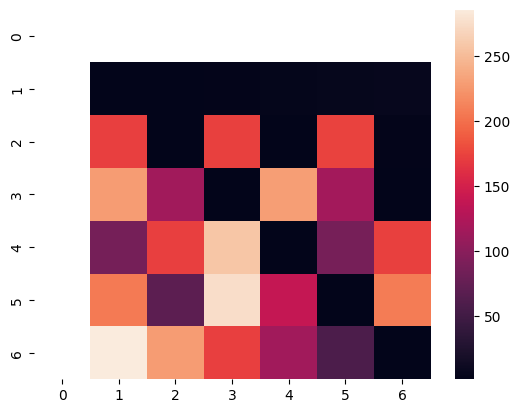

In [4]:
fn.paint()

In [5]:
fn.cardinality_image()

23

In [6]:
fn.cardinality_preimage()

36

In [35]:
fn = HashFn(p)
image_list = list(fn.image)
# Choose a random element from the image
print(pow(p, 3))
z = random.choice(image_list)
z

343


138

In [36]:
# Try and attack z!
exhaustive_attack(z, p)

1 1 1
1 2 172
1 3 229
1 4 86
1 5 206
1 6 286
2 1 2
2 2 1
2 3 115
2 4 172
2 5 69
2 6 229
3 1 3
3 2 173
3 3 1
3 4 258
3 5 275
3 6 172
4 1 4
4 2 2
4 3 230
4 4 1
4 5 138
4 6 115
5 1 5
5 2 174
5 3 116
5 4 87
5 5 1
5 6 58
6 1 6
6 2 3
6 3 2
6 4 173
6 5 207
6 6 1


[(4, 5)]

In [38]:
(138 * 5) % pow(p, 3)

4

In [10]:
exhaustive_attack_improved(z, p)

1 1 1
1 172 172
1 229 229
1 86 86
1 206 206
1 286 286
2 1 2
2 172 1
2 229 115
2 86 172
2 206 69
2 286 229
3 1 3
3 172 173
3 229 1
3 86 258
3 206 275
3 286 172
4 1 4
4 172 2
4 229 230
4 86 1
4 206 138
4 286 115
5 1 5
5 172 174
5 229 116
5 86 87
5 206 1
5 286 58
6 1 6
6 172 3
6 229 2
6 86 173
6 206 207
6 286 1


[(1, 6)]

In [11]:
fn.inv_p3_image_list

[1, 172, 229, 86, 206, 286]

In [12]:
fn.grid()

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,   1.,   2.,   3.,   4.,   5.,   6.],
       [ nan, 172.,   1., 173.,   2., 174.,   3.],
       [ nan, 229., 115.,   1., 230., 116.,   2.],
       [ nan,  86., 172., 258.,   1.,  87., 173.],
       [ nan, 206.,  69., 275., 138.,   1., 207.],
       [ nan, 286., 229., 172., 115.,  58.,   1.]])

In [13]:
fn.inv_p3_image_reverse_dict

{1: 1, 172: 2, 229: 3, 86: 4, 206: 5, 286: 6}

In [14]:
# Test inverses
print(fn.p3)

for y in fn.multiplicative_group_list:

    y_inv = fn.inv_p3(y)
    print(y, y_inv)
    print(y * y_inv)
    assert fn.mod_p3(y, y_inv) == 1, f"({y}, {y_inv}, {fn.mod_p3(y, y_inv)})"

343
1 1
1
2 172
344
3 229
687
4 86
344
5 206
1030
6 286
1716


In [15]:
assert fn.totient_p() == fn.p - 1
assert fn.totient_p3() == (fn.p * fn.p) * (fn.p - 1)

In [16]:
fn.totient_p3()

294

In [17]:
(fn.p * fn.p) * (fn.p - 1)

294

# Checkpoint

Ok, now we have a brute force attack solution + functions to list the cardinatlity of our spaces.
- We can these functions to start gathering information for an attack.

In [18]:
for p in first_n_primes(100)[2:]:
    fn = HashFn(p, verified_prime=True)

    print(f"[{p}]\t{fn.cardinality_preimage()} => {fn.cardinality_image()}")

[5]	16 => 11
[7]	36 => 23
[11]	100 => 63
[13]	144 => 91
[17]	256 => 159
[19]	324 => 203
[23]	484 => 299
[29]	784 => 483
[31]	900 => 555
[37]	1296 => 791
[41]	1600 => 979
[43]	1764 => 1083
[47]	2116 => 1299
[53]	2704 => 1659
[59]	3364 => 2055
[61]	3600 => 2203
[67]	4356 => 2655
[71]	4900 => 2987
[73]	5184 => 3175
[79]	6084 => 3711
[83]	6724 => 4119
[89]	7744 => 4735
[97]	9216 => 5611
[101]	10000 => 6087
[103]	10404 => 6351
[107]	11236 => 6851
[109]	11664 => 7135
[113]	12544 => 7671
[127]	15876 => 9663


[131]	16900 => 10307
[137]	18496 => 11267
[139]	19044 => 11627
[149]	21904 => 13339
[151]	22500 => 13715
[157]	24336 => 14807
[163]	26244 => 15983
[167]	27556 => 16791
[173]	29584 => 18043
[179]	31684 => 19307
[181]	32400 => 19759
[191]	36100 => 21951
[193]	36864 => 22459
[197]	38416 => 23395
[199]	39204 => 23907
[211]	44100 => 26827
[223]	49284 => 29979
[227]	51076 => 31079
[229]	51984 => 31675
[233]	53824 => 32771
[239]	56644 => 34483
[241]	57600 => 35087
[251]	62500 => 38047
[257]	65536 => 39895
[263]	68644 => 41795
[269]	71824 => 43727
[271]	72900 => 44407
[277]	76176 => 46339
[281]	78400 => 47719
[283]	79524 => 48463
[293]	85264 => 51947
[307]	93636 => 56959
[311]	96100 => 58459
[313]	97344 => 59271
[317]	99856 => 60807
[331]	108900 => 66211
[337]	112896 => 68683
[347]	119716 => 72807
[349]	121104 => 73723
[353]	123904 => 75411
[359]	128164 => 77999
[367]	133956 => 81495
[373]	138384 => 84211
[379]	142884 => 86931
[383]	145924 => 88859
[389]	150544 => 91631
[397]	156816 => 95415
[

In [19]:
fp = HashFn(0xd2bf071417608219223ad076131586a9)
fp.rand()

21556660955888281994247673742673353292806516138294615753392768596542977764637716854720660926802054206597557493677728

In [20]:
for _ in range(100):
    print(fp.rand())

10475460170588132041601401104798282080595306979697682894956581368354904854559843873396604117218535550099604735403713
6489969714044901999162828017162116507809604233526780446795398958328572187364360116377389675428325208631477522124012
8691935946540397638537107448210716682530863995931239780248410845247771989675379181372767824014101935845030401739524
12659955656257430458447255631456529981746066687069909564126147308734069151160415543997929289905704388503265740534893
15459306388413960550683804397798405021988996443199447811592456624062018054551369944565181803114236442735942298690011
21476701948507959986856478842134518694066413667454664599247479838826460839744953513301988890963878501243630241270301
18374425297504211564049872997568727320490583852032551823332379102761469128570877666852311670313045023445601387445647
4387215886933023886759135864287789561523125988700103456334845081408548824250493017432962926881025608140300238511874
1024890311064075716490670892384862274110304768843221927151027909249

In [21]:
image = fp.inv_p3_image()

In [22]:
list(itertools.islice(image, 10))

[1,
 10991265834666233499087970174028535523259378656486838215528992384360644547267779442808304850594714522766328035224669,
 7327510556444155666058646782685690348839585770991225477019328256240429698178519628538869900396476348510885356816446,
 16486898751999350248631955261042803284889067984730257323293488576540966820901669164212457275892071784149492052837003,
 8793012667732986799270376139222828418607502925189470572423193907488515637814223554246643880475771618213062428179735,
 3663755278222077833029323391342845174419792885495612738509664128120214849089259814269434950198238174255442678408223,
 18842170002284971712722234584048918039873220553977436940906844087475390652459050473385665458162367753313705203242289,
 19234715210665908623403947804549937165703912648851966877175736672631127957718614024914533488540750414841074061643170,
 2442503518814718555352882260895230116279861923663741825673109418746809899392839876179623300132158782836961785605482,
 15387772168532726898723158243639949732563130119

In [23]:
fp.cardinality_preimage()

78472677610169075517342450380201318059418850679412389886421594721625097653824